### The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Playstore App Data Analysis

In [ ]:
play_store_data = '/content/play_store_data.csv'
play_store_df = pd.read_csv(play_store_data)
user_review_data = '/content/user_reviews.csv'
user_review_df = pd.read_csv(user_review_data)

### Check the few sample of data

In [ ]:
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Get the unique counts and other statistics of every column in the data

In [ ]:
play_store_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_review_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


## Data preprocessing

Check for missing/null values in the data

In [ ]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Columns Rating, Type, Content Rating, Current Ver and Android Ver have 1474, 1, 1, 8, 3 null values in them respectively.

Since Type, Content Rating, Current Ver and Android Ver have very few null values, we can simply drop the rows which contain null values in these columns or we can replace them with the most distributed values by looking at other samples from the data

Let us remove these few samples from the dataset.

In [ ]:
play_store_df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

Looking at the null values again

In [ ]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1469
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

Let us check the mean and median values for replacing the null values 

In [ ]:
mean_value = play_store_df['Rating'].mean()
print('Mean value', mean_value)
median_value = play_store_df['Rating'].median()
print('Median value', median_value)

Mean value 4.191837606837612
Median value 4.3


Since the mean and median both are very close to each other, we can replace missing values with the either of them.

In [ ]:
play_store_df['Rating'].fillna(value=median_value, inplace=True)

Let us cross check if all null values are being replaced 

In [ ]:
play_store_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now the data contains no missing values

Check the data types for all the columns

In [ ]:
play_store_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Convert reviews column to int datatype

In [ ]:
play_store_df['Reviews'] = play_store_df.Reviews.astype(int)

Size Column contains some of the special characters like , , + , M , K & also it has a some of the value as "Varies with device". We need to remove all of these and then convert it to int or float

In [ ]:
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.strip('+')) # removing the + Sign
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace(',', '')) # removing the `,`
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace('M', 'e+6')) # converting the M to 1e+6
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace('k', 'e+3')) # converting the K to 1e+3
play_store_df['Size'] = play_store_df.Size.replace('Varies with device', np.NaN) # replacing varies with device with NaN
play_store_df['Size'] = pd.to_numeric(play_store_df['Size']) # Converting the string to Numeric type

Since we converted the Varies with device value to Nan , so we have to do something with those set of Nan values data. It will be a better idea to drop the Rows of the column Size having Nanvalues because it will be not an efficient idea to replace those values with mean or mode since the size of some apps would be too large and some of them too small.

In [ ]:
play_store_df.dropna(subset=['Size'], inplace=True)

Converting Installs column from object to integer

In [ ]:
play_store_df['Installs'] = play_store_df.Installs.apply(lambda x: x.strip('+'))
play_store_df['Installs'] = play_store_df.Installs.apply(lambda x: x.replace(',', ''))
play_store_df['Installs'] = pd.to_numeric(play_store_df['Installs'])

Converting Price column from object to integer. The values contain a special symbol $ which can be removed and then converted to the numeric type.

In [ ]:
play_store_df['Price'] = play_store_df.Price.apply(lambda x: x.strip('$'))
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'])

In [ ]:
play_store_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## EDA

### Check the correlation between data

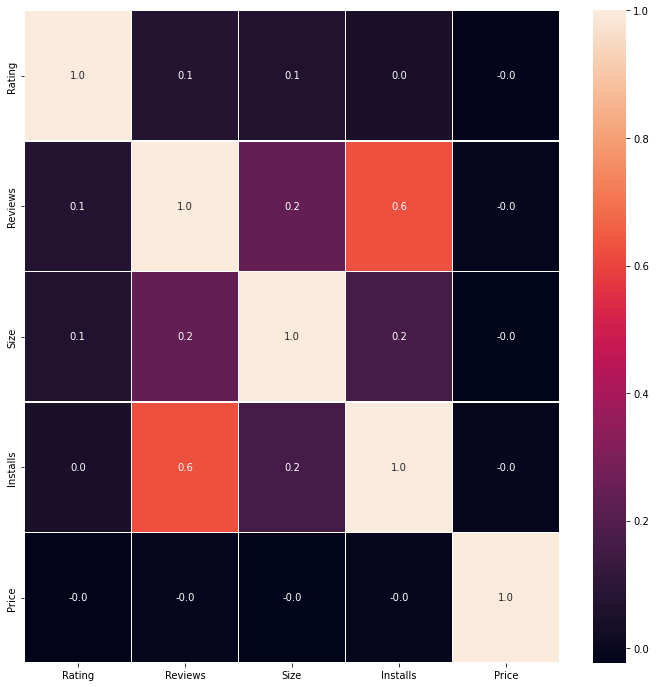

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(play_store_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

As we can see, there is correlation between Reviews and Installs of 0.6

### Top categories in the play store which contains the highest number of apps

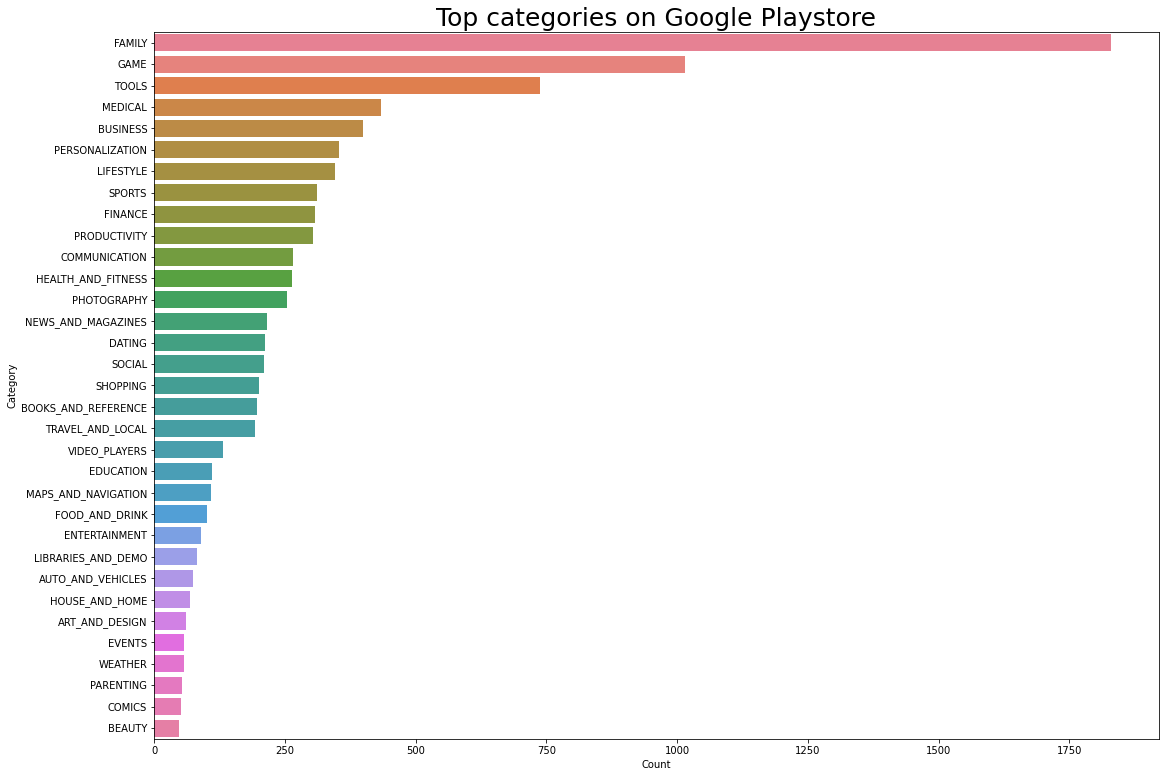

In [ ]:
y = play_store_df['Category'].value_counts().index
x = play_store_df['Category'].value_counts()

xaxis = [x[i] for i in range(len(x))]
yaxis = [y[i] for i in range(len(x))]


plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x=xaxis, y=yaxis, palette="husl")
graph.set_title("Top categories on Google Playstore", fontsize=25);

There are all total of 33 categories in the dataset from the above output we can come to the conclusion that in the play store most of the apps are under Family & Game category and least are of Beauty & Comics Category

### Category of Apps from the ‘Content Rating’ column is found more on the play store

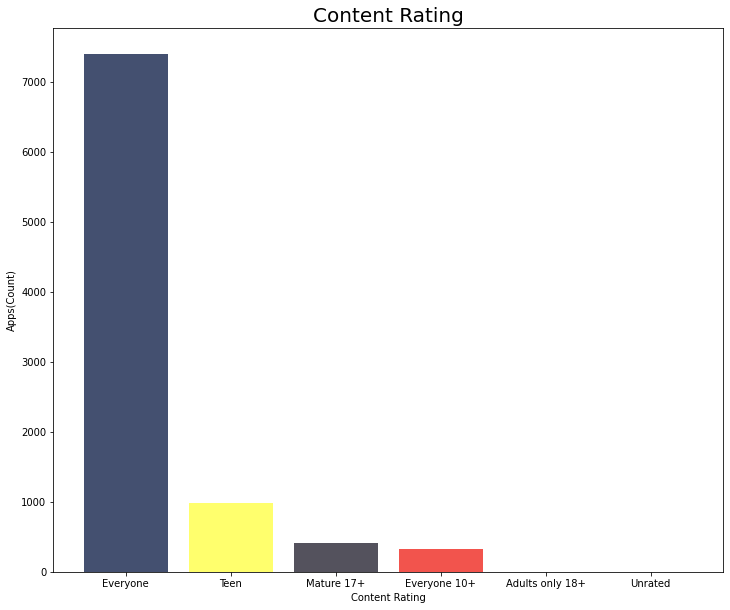

In [ ]:
x = play_store_df['Content Rating'].value_counts().index
y = play_store_df['Content Rating'].value_counts()

xaxis = [x[i] for i in range(len(x))]
yaxis = [y[i] for i in range(len(x))]

plt.figure(figsize=(12,10))
plt.bar(xaxis, yaxis, width=0.8, color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size=20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

Everyone category has the highest number of apps.

### Distribution of the ratings of the data frame.

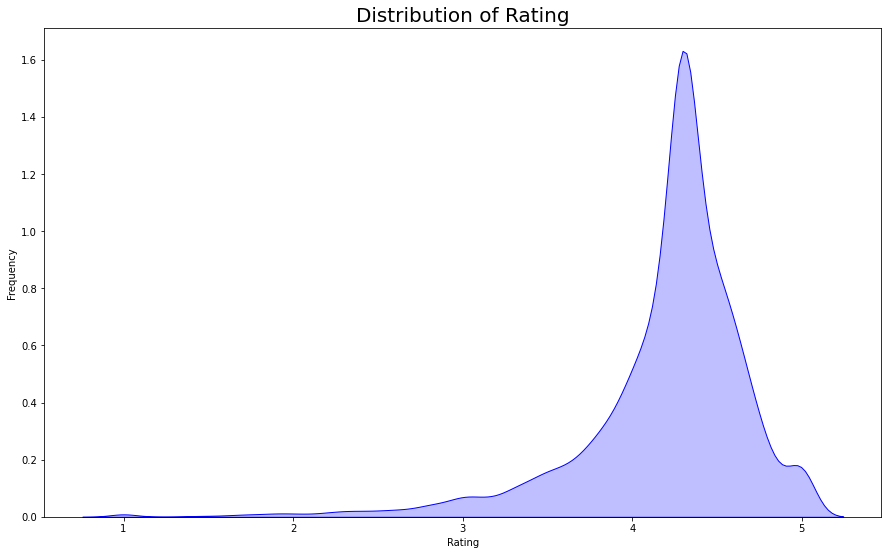

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(play_store_df.Rating, color="Blue", shade=True)
plt.title('Distribution of Rating',size=20);

Most of the apps in the google play store are rated between 4 to 5

### Apps which are paid and free

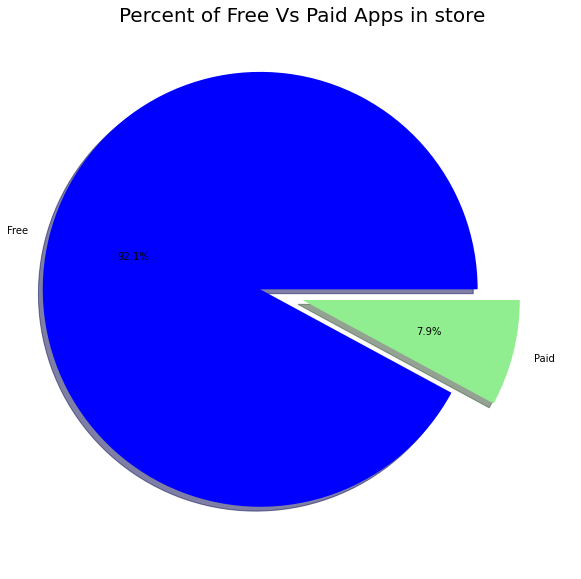

In [ ]:
plt.figure(figsize=(10,10))
labels = play_store_df['Type'].value_counts(sort=True).index
sizes = play_store_df['Type'].value_counts(sort=True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

Approximately 92% apps are free and 8% apps are paid 

### App’s having most number of installs

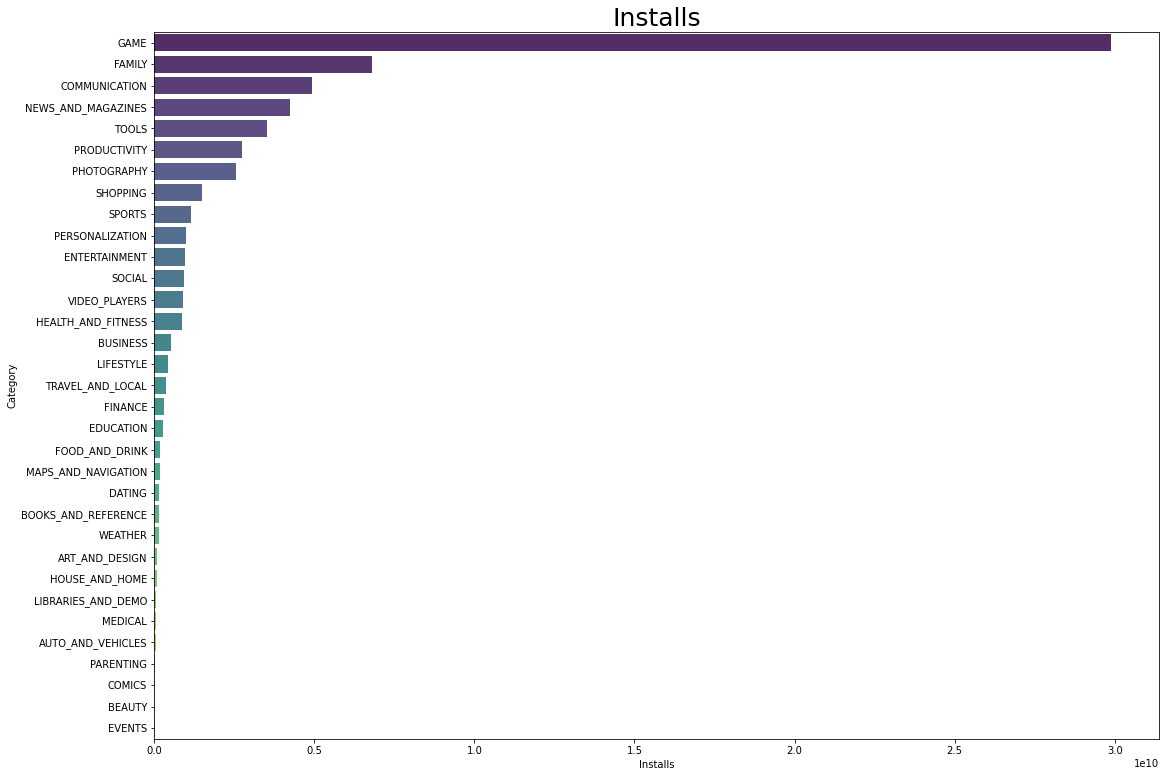

In [ ]:
most_install_dfs = play_store_df.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

xaxis = [most_install_dfs.Installs[i] for i in range(len(most_install_dfs))]
yaxis = [most_install_dfs.index[i] for i in range(len(most_install_dfs))]

plt.figure(figsize=(18,13))
plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x=xaxis, y=yaxis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

The top categories with the highest installs are Game, Family, Communication, News & Magazines, & Tools.

### Top 25 installed apps in Game category

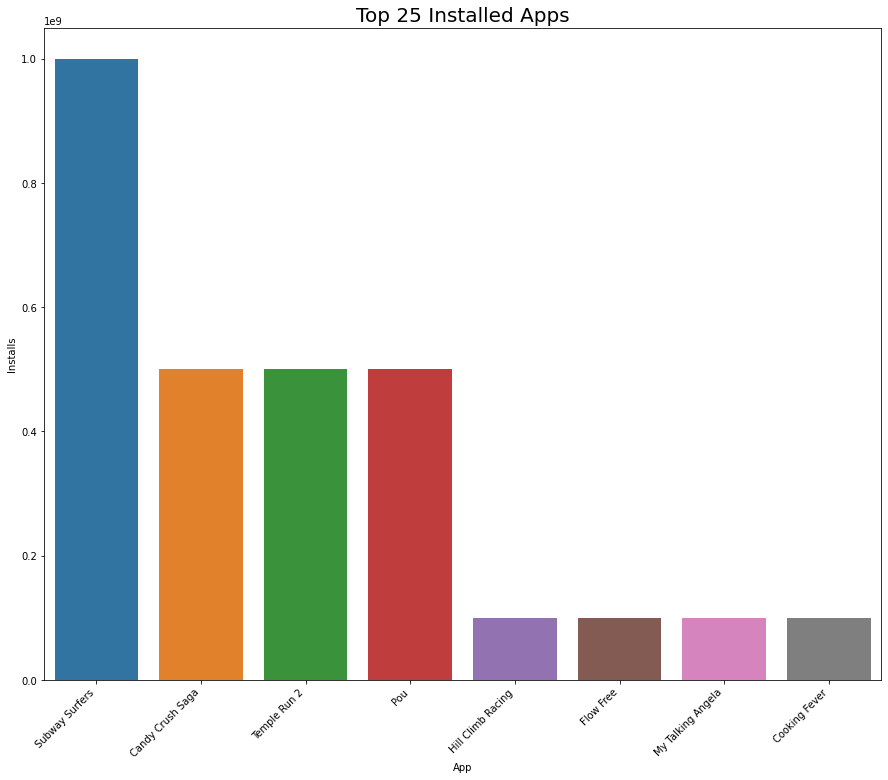

In [ ]:
top = play_store_df[play_store_df['Category'] == 'GAME']
topapps = top.sort_values(by='Installs', ascending=False).head(25)
# Top_Apps_in_art_and_design
plt.figure(figsize=(15,12))
plt.title('Top 25 Installed Apps',size = 20);    
graph = sns.barplot(x=topapps.App, y=topapps.Installs)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right');

Top 10 expensive Apps in the play store

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


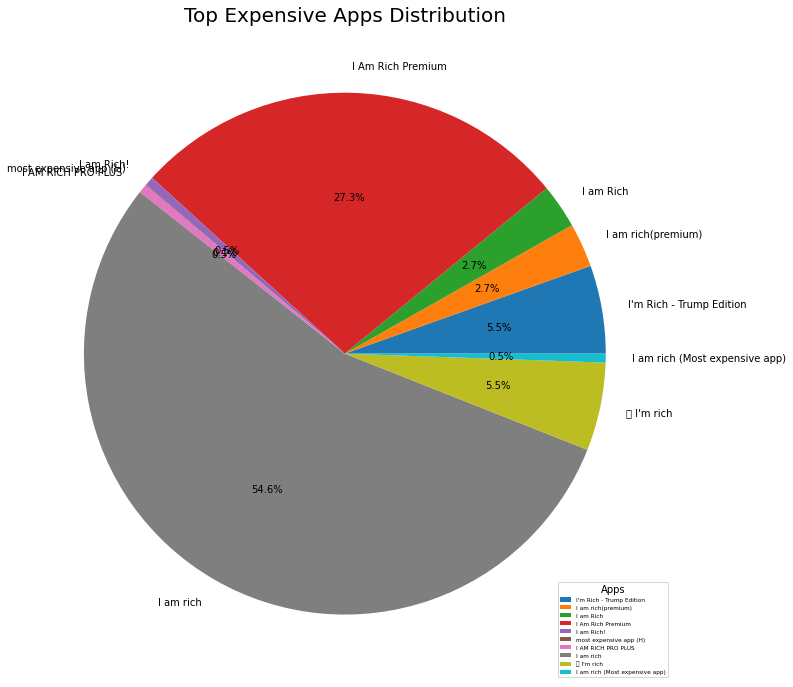

In [ ]:
topPaidApps = play_store_df[play_store_df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
topPaidApps_df = topPaidApps[['App', 'Installs']].drop(9934)

plt.figure(figsize=(15,12));
plt.pie(topPaidApps_df.Installs, explode=None, labels=topPaidApps_df.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(topPaidApps_df.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

I am rich is the most expensive app in the google play store followed by I am Rich Premium. we also had to drop one-row data for this visualization because the language of the app was Chinese and it was messing with the pie chart, visualization

### Count of apps in different genres

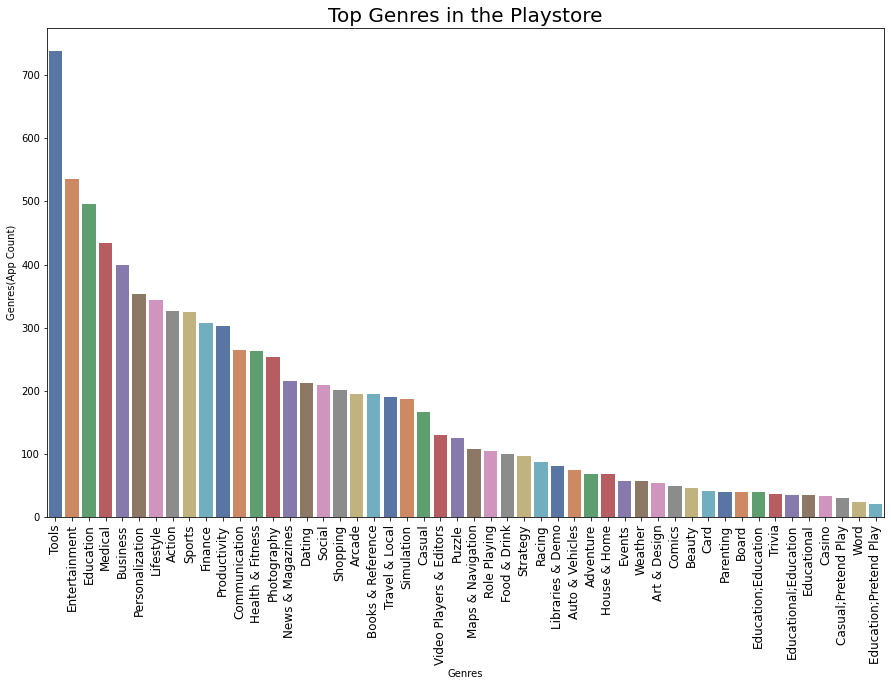

In [ ]:
topAppsinGenres = play_store_df['Genres'].value_counts().head(50)

xaxis = [topAppsinGenres.index[i] for i in range(len(topAppsinGenres))]
yaxis = [topAppsinGenres[i] for i in range(len(topAppsinGenres))]

plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=xaxis, y=yaxis, palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

Highest Number of Apps are found in the Tools and Entertainment genres followed by Education, Medical and many more.

Apps that have made the highest-earning

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


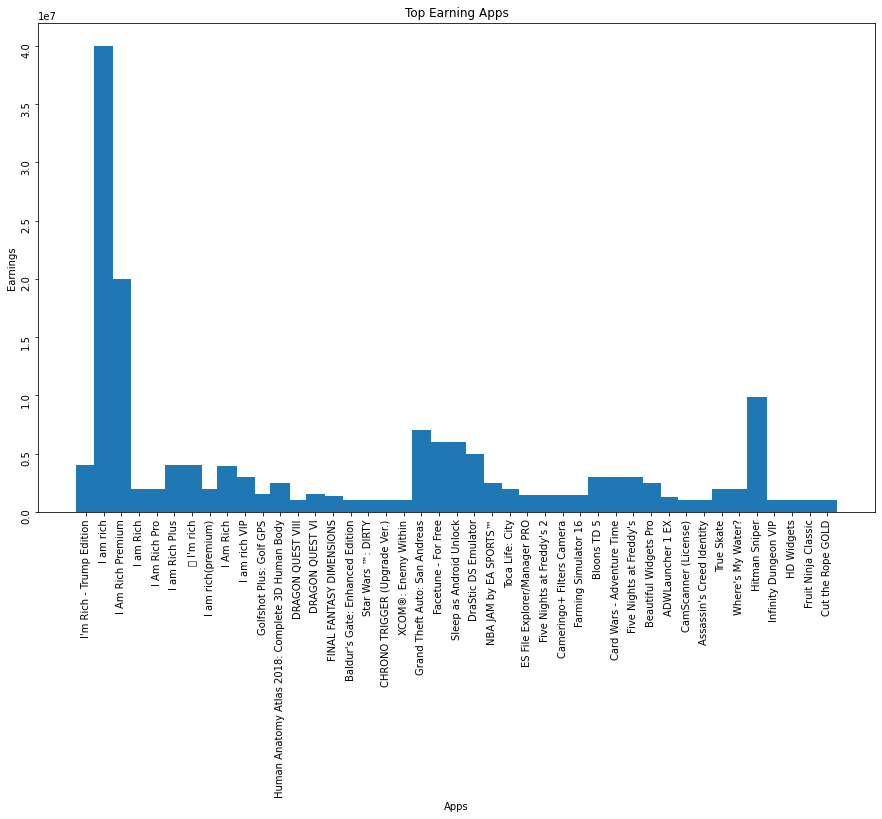

In [ ]:
Paid_Apps_df = play_store_df[play_store_df['Type'] == 'Paid']
earning_df = Paid_Apps_df[['App', 'Installs', 'Price']]
earning_df['Earnings'] = earning_df['Installs'] * earning_df['Price'];
earning_df_sorted_by_Earnings = earning_df.sort_values(by='Earnings', ascending=False).head(50)
earning_df_sorted_by_Price = earning_df_sorted_by_Earnings.sort_values(by='Price', ascending=False)

plt.figure(figsize=(15,9))
plt.bar(earning_df_sorted_by_Price.App, earning_df_sorted_by_Price.Earnings, width=1.1, label=earning_df_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

The top five apps with the highest earnings found on google play store are: I am Rich, I am Rich Premium, Hitman Sniper, Grand Theft Auto: San Andreas, Facetune - For Free

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

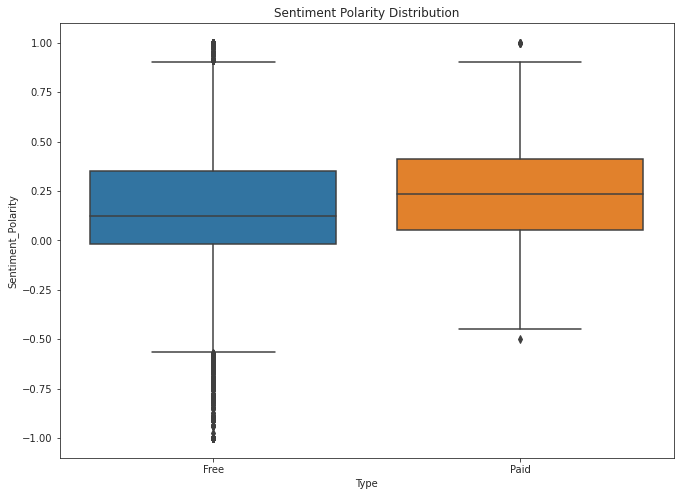

In [ ]:
# Join and merge the two dataframe
merged_df = pd.merge(play_store_df, user_review_df, on='App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

Free apps receive a lot of negative comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This helps indicate about the app quality, i.e. paid apps being of higher quality than free apps on average.

In [ ]:
user_review_df1 = user_review_df.dropna(inplace=False)

# Create the Likert Scale
likert = {
  "Negative": -1,
  "Neutral": 0,
  "Positive": 1
}

# Transform the Sentument column to match the Likert Scale value
user_review_df1.Sentiment = user_review_df1.Sentiment.apply(lambda x: likert[x]).copy()

# Here, we obtain the mean for each app by grouping the data
reviews_mean = user_review_df1.groupby("App").mean().copy()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
complete_data = pd.merge(left=play_store_df, right=reviews_mean, on="App").copy()

# Drop duplicates
complete_data.drop_duplicates("App", inplace=True)

# Reset the index since now we have a different number of observations
complete_data = complete_data.reset_index().drop("index", axis=1).copy()

# Select columns that will be used
columns = [0, 1, 2, 3, 5, 6, 8, 9, 13, 14, 15]
complete_data = complete_data.iloc[:,columns].copy()


### Analyzing how sentiment influences the rating of the app

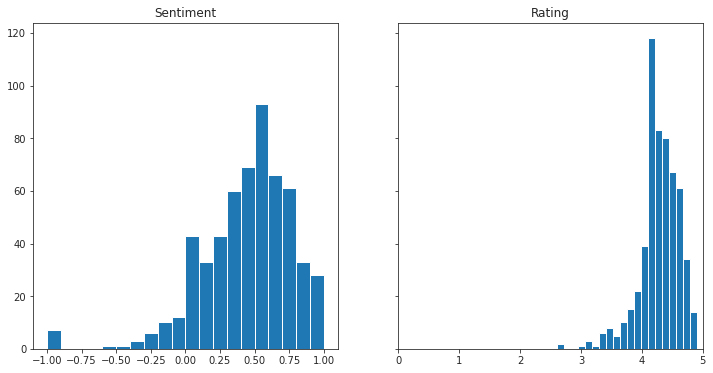

In [ ]:
# Create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Create the histograms
ax[0].hist(complete_data.Sentiment, bins=20)
ax[1].hist(complete_data.Rating, bins=20)
ax[1].set_xlim(0, 5)

# Add titles
ax[0].set_title("Sentiment")
ax[1].set_title("Rating")

plt.show()

In the Sentiment aspect, the majority of the values are above neutral (0), at around 0,5 for a range of -1 to 1. But for the Rating column, this trend looks way more significant, with a lot of the values being around 4 and 5 for a range of 0 to 5